In [1]:
# Mycelial Growth Simulation

# This notebook runs the mycelial growth simulation and visualizes the results.


Time(hr) | Tips | Pullers | Density(μm) | % Saturation | Mergers
--------------------------------------------------------
   0.0 |  1.0 |     0.3 |        0.0 |   0.0% |      0
  50.0 |   24 |       7 |      134.4 |   7.9% |     26
 100.0 |   49 |      14 |      274.4 |  16.1% |     51
 150.0 |   74 |      22 |      414.4 |  24.4% |     75
 200.0 |   98 |      29 |      548.8 |  32.3% |    101
 250.0 |  125 |      37 |      700.0 |  41.2% |    123
 300.0 |  145 |      43 |      812.0 |  47.8% |    152
 350.0 |  167 |      50 |      935.2 |  55.0% |    179
 400.0 |  192 |      57 |     1075.2 |  63.2% |    204
 450.0 |  214 |      64 |     1198.4 |  70.5% |    231
 500.0 |  241 |      72 |     1349.6 |  79.4% |    253
 550.0 |  272 |      81 |     1523.2 |  89.6% |    272
 600.0 |  298 |      89 |     1668.8 |  98.2% |    295
 650.0 |  320 |      96 |     1700.0 | 100.0% |    322
 700.0 |  342 |     102 |     1700.0 | 100.0% |    350
 750.0 |  372 |     111 |     1700.0 | 100.0% |    36

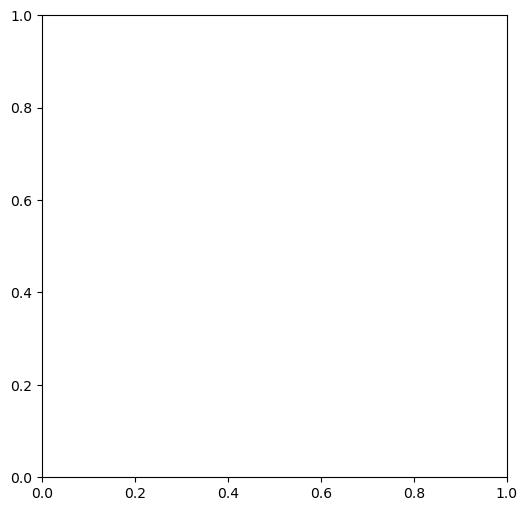

In [ ]:
# Import necessary modules
from mycelial_growth import MycelialNetwork
import numpy as np
import plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Initialize the simulation
total_time = 1000  # Total simulation time in hours
plot_interval = 50  # Plot every n hours
num_iterations = int(total_time / plot_interval)  # Number of iterations

# Create an instance of the MycelialNetwork class
model = MycelialNetwork(total_time=total_time, plot_interval=plot_interval)

# Run the simulation
print("Time(hr) | Tips | Pullers | Density(μm) | % Saturation | Mergers")
print("--------------------------------------------------------")
model.print_status(0)  # Initial state

# Run the simulation loop
iteration_count = 0
while model.time < total_time:
    model.update()
    iteration_count += 1
    # Print and plot at regular intervals
    if abs(model.time % plot_interval) < model.Δt:
        model.print_status(int(model.time))
        plotting.plot_network(model.time_series, model.tips_series, model.ρ_series, model.tip_positions, model.output_dir, int(model.time), model.time, model.ρ_sat)

# Print the number of iterations
print(f"Total iterations: {iteration_count}")

# Plot the final results
plotting.plot_mycelial_network(model.time_series, model.tips_series, model.ρ_series, model.tip_positions, model.output_dir, model.total_time)

# Create an animation of the mycelial network growth
fig, ax = plt.subplots(figsize=(6, 6))

def update_plot(frame):
    ax.clear()
    time_index = frame * plot_interval
    if time_index >= len(model.time_series):
        time_index = len(model.time_series) - 1
    time = model.time_series[time_index]
    tip_positions = model.tip_positions
    rho = model.ρ_series[time_index]

    # Debug print
    print(f"Animating frame {frame} at time {time:.1f} hr with {len(tip_positions)} tips")

    # Plot tips at their actual positions
    ax.scatter(tip_positions[:, 0], tip_positions[:, 1], color='blue', label='Tips', s=5)

    # Plot hyphal density as a background color
    density_background = np.full((100, 100), rho / model.ρ_sat)
    ax.imshow(density_background, extent=(-10, 10, -10, 10), cmap='Greens', alpha=0.5)

    # Draw connections between merged tips
    if len(tip_positions) > 1:
        dist_matrix = np.linalg.norm(
            tip_positions[:, None] - tip_positions[None, :],
            axis=-1
        )
        # Show connections within merge distance
        for i in range(len(tip_positions)):
            for j in range(i + 1, len(tip_positions)):
                if dist_matrix[i, j] < 1.5:  # Slightly larger than merge distance for visibility
                    ax.plot([tip_positions[i, 0], tip_positions[j, 0]],
                            [tip_positions[i, 1], tip_positions[j, 1]],
                            'g-', alpha=0.3, linewidth=0.5)

    ax.set_title(f'Mycelial Network at t={time:.1f} hr')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()

ani = animation.FuncAnimation(fig, update_plot, frames=int(total_time / plot_interval), repeat=False)
plt.show()
